# NLP Pipeline for a Supervised Text Classification Problem

In this work, it will be created such a pipeline for a supervised classification problem: Classifying whether a movie review is negative or positive based on viewers comments.

First of all, I will apply some statistical models, check the best and score and, after applying normalization, tokenization and vectorization and other tools in order to reduce the text complexit, we will apply the models again and compare their performance.

### Pipeline: 
1. Exploring Data
2. Normalizing and Tokenizing
3. Splitting text into words or tokens
4. Semming and Lemmatization
5. Modeling
6. Evaluating 

##Importing the Packages

In [2]:
import pandas as pd
import string

##Getting the Dataset

In [214]:
df = pd.read_csv('IMDB Dataset.csv', sep=',', delimiter=None, index_col=None, engine=None,)

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


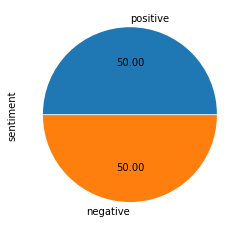

In [8]:
df['sentiment'].value_counts().plot.pie(autopct='%.2f', explode=[0.01, 0])

#Exploring the data

In [11]:
print('Negative \n')
print(df.review[189])

Negative 

I don't believe there has ever been a more evil or wicked television program to air in the United States as The 700 Club. They are today's equivalent to the Ku Klux Klan of the 20th century. Their hatred of all that is good and sweet and human and pure is beyond all ability to understand. Their daily constant attacks upon millions and millions of Americans, as well as billions of humans the world over, who don't happen to share their bigoted, cruel, monstrous, and utterly insane view of humanity is beyond anything television has ever seen. The lies they spout and the ridiculous lies they try to pass off as truth, such as the idea of "life after death" or "god" or "sin" or "the devil" is so preposterous that they actually seem mentally ill, so lost are they in their fantasy. Sane people know that religion is a drug and shouldn't let themselves get addicted to that type of fantasy. However, The 700 Club is in a class by itself. They are truly a cult. While I believe in freedom

In [16]:
print('Positive \n')
print(df.review[49000])

Positive 

I haven't laughed this hard at a movie in a long time. I got to go to an advance screening, and was thrilled because I had been dying to see it. I had tears in my eyes from laughter throughout a lot of the movie. The audience all shared my laughter, and was clapping and yelling throughout most of the movie.<br /><br />Kudos to Steve Carrell(who I had already been a fan of). He proves in this movie his tremendous talent for comedy. He has a style that I haven't seen before. And Catherine Keener is excellent as always. Thank God there wasn't a cameo from Will Ferrell(love him, but saw him too much this summer).<br /><br />There were parts of comedic genius in this movie. Partly thanks to Carrell, and partly thanks to the writing(also Carrell). The waxing scene and the speed dater with the "obvious problem" were absolutely hysterical.<br /><br />I will definitely go see '40 Year Old Virgin' when it's released. My advice: go to see it for huge laughs and an incredibly enjoyable 

In [215]:
classification = df['sentiment'].replace(['negative', 'positive'], [0, 1])

In [216]:
df['classification'] = classification
df.head()

,review,sentiment,classification
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [20]:
df.tail(5)

,review,sentiment,classification
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0
49999,No one expects the Star Trek movies to be high...,negative,0


### The most frequent words in the overviews

In [21]:
from collections import Counter 
c = Counter() 

In [22]:
df.review.str.lower().str.split() 
df.review.str.lower().str.split(" ") 
df.review.str.lower().str.split(" ").apply(c.update) 
c.most_common(10)

[('the', 638821),
 ('a', 316606),
 ('and', 313602),
 ('of', 286653),
 ('to', 264567),
 ('is', 204867),
 ('in', 179798),
 ('i', 141577),
 ('this', 138472),
 ('that', 130133)]

### Checking the most frequent words for each sentiment

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [29]:
def neg_word_cloud(dataset, column):
  text_negative = dataset.query('sentiment == "negative"')
  full_wording = ' '.join([dataset for dataset in text_negative[column]])

  wc = WordCloud(width=800, height= 500,
                            max_font_size=110, collocations=False).generate(full_wording)

  plt.figure(figsize=(10,7))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()   

Negative WordCloud


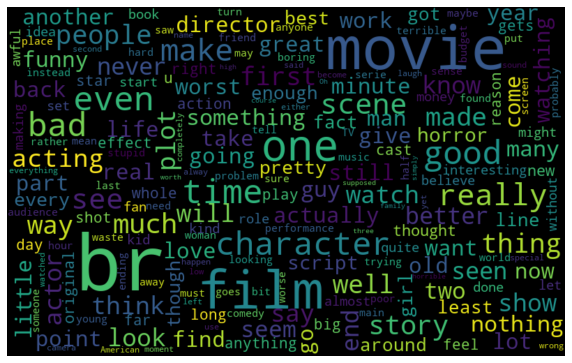

In [30]:
print("Negative WordCloud")
neg_word_cloud(df, 'review')

In [31]:
def pos_word_cloud(dataset, column):
  text_positive = dataset.query('sentiment == "positive"')
  full_wording = ' '.join([dataset for dataset in text_positive[column]])

  wc = WordCloud(width=800, height= 500,
                            max_font_size=110, collocations=False).generate(full_wording)

  plt.figure(figsize=(10,7))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()  

Positive WordCloud


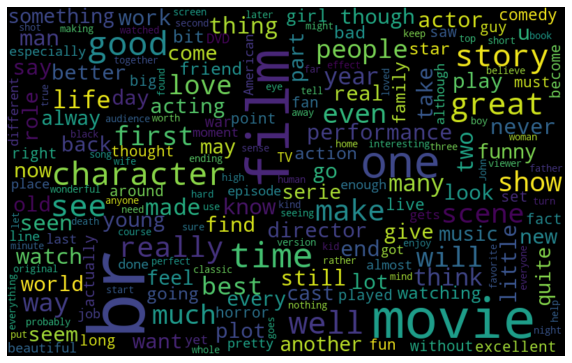

In [32]:
print("Positive WordCloud")
pos_word_cloud(df, 'review')

##Modeling Functions

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tag.api import accuracy
from sklearn.feature_extraction.text import TfidfVectorizer

In [186]:
def modeling(model, vector):
  X_train, X_test, y_train, y_test = train_test_split(
        vector, df.classification, test_size = 0.30, random_state = 42, stratify = df.classification)
  model.fit(X_train, y_train)
  y_prediction = model.predict(X_test)
  accuracy = accuracy_score(y_prediction, y_test)
  return accuracy

# 1st Round - Modeling

###Vectorizing

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
vetorizer = CountVectorizer(lowercase=False)
vector_01 = vetorizer.fit_transform(df.review)
print(vector_01.shape)

(50000, 129988)


###Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
LG_model = LogisticRegression(solver='lbfgs', max_iter=1000)

LG_ac_01 = modeling(LG_model, vector_01)
print('Logistic Regression accuracy: ', LG_ac_01)

Logistic Regression accuracy:  0.8914666666666666


###Multinomial Naive Bayes

In [188]:
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()

MNB_ac_01 = modeling(MNB_model, vector_01)
print('Multinomial Naive Bayes: ', MNB_ac_01)

Multinomial Naive Bayes:  0.8506666666666667


###Decision Tree Classifier

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()

DT_ac_01 = modeling(MNB_model, vector_01)
print('Decision Tree Classifier: ', DT_ac_01)

Decision Tree Classifier:  0.8506666666666667


#Normalizing the dataset

###Tokenizing

In [217]:
from nltk import tokenize

In [218]:
tk_punct = tokenize.WordPunctTokenizer()
tk_white_space = tokenize.WhitespaceTokenizer()

###Punctuation

In [121]:
from string import punctuation

In [219]:
p_list = list()
extras = ['//', 'x', 'xx', 'xxx', 'xxxx', '{', '}', '$', '{$', 'br', '/', '>','<', '/><', '/>']
for p in punctuation:
  p_list.append(p)
for q in extras:
  p_list.append(q)
print(p_list)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '//', 'x', 'xx', 'xxx', 'xxxx', '{', '}', '$', '{$', 'br', '/', '>', '<', '/><', '/>']


###Stopwords

In [220]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
sw = nltk.corpus.stopwords.words('english')

In [221]:
punctuation_stopwords = p_list + sw
processing = []
for r in df['review']:
  new = []
  r = r.lower()
  token_text = tk_punct.tokenize(r)
  for w in token_text:
    if w not in punctuation_stopwords:
      new.append(w)
  processing.append(' '.join(new))

df['normalized'] = processing

In [222]:
df[['review', 'normalized', 'sentiment','classification']].head()

,review,normalized,sentiment,classification
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...,positive,1
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,positive,1
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,positive,1
3,Basically there's a family where a little boy ...,basically family little boy jake thinks zombie...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...,positive,1


# 2nd Round - Modeling

In [127]:
vector_02 = vetorizer.fit_transform(df.normalized)

In [190]:
LG_ac_02 = modeling(LG_model, vector_02)
print('Logistic Regression accuracy: ', LG_ac_02)

MNB_ac_02 = modeling(MNB_model, vector_02)
print('Multinomial Naive Bayes: ', MNB_ac_02)

DT_ac_02 = modeling(MNB_model, vector_02)
print('Decision Tree Classifier: ', DT_ac_02)

Logistic Regression accuracy:  0.8916
Multinomial Naive Bayes:  0.8615333333333334
Decision Tree Classifier:  0.8615333333333334


#Stemming and Lemmatization 

In [235]:
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [243]:
df['tokens'] = df.normalized.apply(word_tokenize)

In [266]:
def stem_words(words):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

df['stemming'] = df['tokens'].apply(stem_words)
df['stemming'] = df['stemming'].apply(lambda x: ' '.join(x))

In [268]:
def lemmatize_words(words):
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  return lemmatized_words

df['lemmatizer'] = df['tokens'].apply(lemmatize_words)
df['lemmatizer'] = df['lemmatizer'].apply(lambda x: ' '.join(x))

In [269]:
df[['review', 'normalized', 'tokens', 'stemming', 'lemmatizer', 'sentiment', 'classification']].head()

,review,normalized,tokens,stemming,lemmatizer,sentiment,classification
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...,"[one, reviewers, mentioned, watching, 1, oz, e...",one review mention watch 1 oz episod hook righ...,one reviewer mentioned watching 1 oz episode h...,positive,1
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn...",wonder littl product film techniqu unassum old...,wonderful little production filming technique ...,positive,1
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...",thought wonder way spend time hot summer weeke...,thought wonderful way spend time hot summer we...,positive,1
3,Basically there's a family where a little boy ...,basically family little boy jake thinks zombie...,"[basically, family, little, boy, jake, thinks,...",basic famili littl boy jake think zombi closet...,basically family little boy jake think zombie ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...,"[petter, mattei, love, time, money, visually, ...",petter mattei love time money visual stun film...,petter mattei love time money visually stunnin...,positive,1


# 3rd Round - Modeling

In [270]:
vector_03 = vetorizer.fit_transform(df.stemming)

In [271]:
LG_ac_03 = modeling(LG_model, vector_03)
print('Logistic Regression accuracy: ', LG_ac_03)

MNB_ac_03 = modeling(MNB_model, vector_03)
print('Multinomial Naive Bayes: ', MNB_ac_03)

DT_ac_03 = modeling(MNB_model, vector_03)
print('Decision Tree Classifier: ', DT_ac_03)

Logistic Regression accuracy:  0.8828
Multinomial Naive Bayes:  0.8536
Decision Tree Classifier:  0.8536


#4th Round - Modeling with TF-IDF

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_2n = TfidfVectorizer(ngram_range=(1,2))
vector_tfidf_2n = tfidf_2n.fit_transform(df['normalized'])

tfidf = TfidfVectorizer()
vector_tfidf = tfidf.fit_transform(df['normalized'])

In [192]:
LG_ac_04 = modeling(LG_model, vector_tfidf_2n)
print('Logistic Regression accuracy: ', LG_ac_04)

MNB_ac_04 = modeling(MNB_model, vector_tfidf_2n)
print('Multinomial Naive Bayes: ', MNB_ac_04)

DT_ac_04 = modeling(MNB_model, vector_tfidf_2n)
print('Decision Tree Classifier: ', DT_ac_04)

Logistic Regression accuracy:  0.893
Multinomial Naive Bayes:  0.8858
Decision Tree Classifier:  0.8858


In [193]:
LG_ac_05 = modeling(LG_model, vector_tfidf)
print('Logistic Regression accuracy: ', LG_ac_05)

MNB_ac_05 = modeling(MNB_model, vector_tfidf)
print('Multinomial Naive Bayes: ', MNB_ac_05)

DT_ac_05 = modeling(MNB_model, vector_tfidf)
print('Decision Tree Classifier: ', DT_ac_05)

Logistic Regression accuracy:  0.8959333333333334
Multinomial Naive Bayes:  0.8652
Decision Tree Classifier:  0.8652


#Evaluating

In [272]:
import pandas as pd

table = {'Logistic Regression': [LG_ac_01, LG_ac_02, LG_ac_03, LG_ac_04, LG_ac_05],
        'Multinomial Naive Bayes': [MNB_ac_01, MNB_ac_02, MNB_ac_03, MNB_ac_04, MNB_ac_05],
        'Decision Tree Classifier': [DT_ac_01, DT_ac_02, DT_ac_03, DT_ac_04, DT_ac_05]}

ScoreTable = pd.DataFrame(table, index=[1, 2, 3, 4, 5])
print(ScoreTable)

   Logistic Regression  Multinomial Naive Bayes  Decision Tree Classifier
1             0.891467                 0.850667                  0.850667
2             0.891600                 0.861533                  0.861533
3             0.882800                 0.853600                  0.853600
4             0.893000                 0.885800                  0.885800
5             0.895933                 0.865200                  0.865200


### Confusion Matrix for our best model

In [197]:
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    vector_tfidf, df.classification, test_size = 0.30, random_state = 42, stratify = df.classification)

LG_model.fit(X_train, y_train)
LG_pred = LG_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, LG_pred)
print(conf_matrix)

print(classification_report(y_test, LG_pred))

[[6658  842]
 [ 719 6781]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7500
           1       0.89      0.90      0.90      7500

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



##LDA

In [278]:
from sklearn.decomposition import LatentDirichletAllocation

LDA2 = LatentDirichletAllocation(n_components=2,random_state=42)

In [279]:
df_train, df_test = train_test_split(df,
                                     test_size = 0.3, 
                                     random_state = 42)

vetorizer_2 = CountVectorizer(ngram_range=(1,1))
vector_fit = vetorizer_2.fit_transform(df_train.normalized)

text_vect_train = vetorizer_2.transform(df_train.normalized)

LDA2.fit(text_vect_train)

LatentDirichletAllocation(n_components=2, random_state=42)

In [281]:
terms = vetorizer_2.get_feature_names()

for index, topic in enumerate(LDA2.components_):
    terms_comp = zip(terms, topic)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:40]
    print("THE TOP 40 WORDS FOR TOPIC # "+str(index)+": ")
    #print(sorted_terms)
    print([t[0] for t in sorted_terms])
    print('\n')

THE TOP 40 WORDS FOR TOPIC # 0: 
['film', 'one', 'story', 'well', 'also', 'like', 'time', 'movie', 'life', 'man', 'great', 'two', 'good', 'character', 'would', 'much', 'films', 'even', 'love', 'see', 'best', 'many', 'way', 'first', 'young', 'little', 'characters', 'world', 'get', 'people', 'made', 'never', 'scene', 'director', 'years', 'work', 'role', 'real', 'us', 'performance']


THE TOP 40 WORDS FOR TOPIC # 1: 
['movie', 'film', 'one', 'like', 'good', 'really', 'even', 'would', 'bad', 'see', 'time', 'movies', 'get', 'people', 'much', 'watch', 'think', 'could', 'well', 'first', 'make', 'story', 'made', 'show', 'seen', 'acting', 'great', 'plot', 'know', 'ever', 'way', 'characters', 'say', 'better', 'also', 'watching', 'never', 'funny', 'something', 'thing']




#Exporting the Model

In [ ]:
import pickle

pickle.dump(LG_model, open('Log_RG_model.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf_vetorizer.pkl', 'wb'))

In [ ]:
!ls -la

total 110096
drwxr-xr-x 1 root root     4096 Jan 31 16:47 .
drwxr-xr-x 1 root root     4096 Jan 31 16:13 ..
drwxr-xr-x 4 root root     4096 Jan 27 14:36 .config
drwx------ 5 root root     4096 Jan 31 16:17 drive
-rw-r--r-- 1 root root 42095061 Jan 31 16:22 IMDB_Data.csv
-rw-r--r-- 1 root root 66212309 Jan 31 16:25 IMDB-Dataset.csv
drwxr-xr-x 2 root root     4096 Jan 31 16:18 .ipynb_checkpoints
-rw-r--r-- 1 root root   911903 Jan 31 16:47 Log_RG_model.pkl
drwxr-xr-x 1 root root     4096 Jan 27 14:36 sample_data
-rw-r--r-- 1 root root  3481004 Jan 31 16:47 tfidf_vetorizer.pkl


In [ ]:
Log_RG_model = pickle.load(open('Log_RG_model.pkl', 'rb'))
tfidf_vetorizer = pickle.load(open('tfidf_vetorizer.pkl', 'rb'))